# **<font color=red> &#x2022;<u>TASK</u>: monk - **SVM**: *svc* - version with *grid_search*  </font>** <br>
## TRAINING SET:

initialization of monk utlities:

In [36]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, make_scorer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from numpy.linalg import norm
import math
import matplotlib.pyplot as plt

from utils_svm import * #custom module , funziona con 3.9.xx

#-----------
##QUI UTILIZZIAMO L'ACCURACY COME SCORE

#custom_mee_scorer = make_scorer(MEE,greater_is_better=True)

labels_name = ["1", "0"] #label output 

fine init monk df utilities

------

## **<font color=violet> 1. Kernel and parameters definitions </font>**
USIAMO GLI STESSI PARAMETRI SIA SUI MONK CHE SULLA CUP

In [37]:
rbf_kernel=['rbf']
rbf_C_list=[0.1,1,10,100,1000] 
rbf_gamma_list= ["auto", "scale"]
rbf_epsilon_list=[0.001] 

rbf_param_grid = {'kernel' : rbf_kernel,
            'C' : rbf_C_list,
            'gamma' : rbf_gamma_list}
            #'epsilon': rbf_epsilon_list}

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

poly_kernel=['poly']
poly_C_list=[0.1,0.5,1,2,5] 
poly_epsilon_list=[0.01]
poly_coeff_list=[0.5,1.0,1.5]
poly_degree_list = [2,3,4,5]

poly_param_grid = {'kernel' : poly_kernel,
            'C' : poly_C_list,
            #'epsilon': poly_epsilon_list,
            'coef0': poly_coeff_list,
            'degree': poly_degree_list}

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

sig_kernel=['sigmoid']
sig_C_list=[0.0001,0.001,0.01,0.1,1] 
sig_gamma_list= ["auto", "scale"]
sig_epsilon_list=[0.001]
sig_coeff_list=[1.0,2.0,3.0]


sig_param_grid = {'kernel' : sig_kernel,
            'C' : sig_C_list,
            'gamma' : sig_gamma_list,
            #'epsilon': sig_epsilon_list,
            'coef0': sig_coeff_list}


In [38]:
def monk_train_gridsearch_bykernel(X_train, y_train, param_grid_by_kernel, prints=None):

    param_dist = param_grid_by_kernel
    clf = SVC()

    grid_search = GridSearchCV(clf, 
                            param_grid=param_dist,
                            n_jobs=12, 
                            scoring='accuracy', 
                            verbose=0)
  
    grid_search.fit(X_train, y_train)

    if(prints):
        print('Best score on validation set',grid_search.best_score_,)
        print('Best parameters\n', grid_search.cv_results_['params'][0],"; MEE Mean =", grid_search.cv_results_['mean_test_score'][0], "; STD =",grid_search.cv_results_['std_test_score'][0])
    
    accuracy_Validation = grid_search.cv_results_['mean_test_score'][0]

    return grid_search,accuracy_Validation


def monk_predict_get_metrics_from_gs(X_train,y_train,grid_search_bykernel, X_test,Y_test, test=False):
    dict_metrics = {'accuracy':[],'mae':[],'mse':[],'mee':[]}

    #predict sull'input set del train set
    if(test==False):
        y_pred = grid_search_bykernel.predict(X_train)
        y_true = y_train
    else:
        y_pred = grid_search_bykernel.predict(X_test)
        y_true = Y_test

    accuracy = accuracy_score(y_true=y_true,y_pred=y_pred)
    mae, mee, mse = get_mae_mee_mse_from_gridsearch(grid_search=grid_search_bykernel,Y_true=y_true,Y_pred=y_pred)
    
    dict_metrics["accuracy"].append(accuracy)
    dict_metrics["mae"].append(mae)
    dict_metrics["mse"].append(mse)
    dict_metrics["mee"].append(mee)
    
    return dict_metrics
  
def create_Xy_sets_by_n(monk_n):   
    df_train = monk_create_df(monk_n)
    df_test = monk_create_df(monk_n, train=False)

    X_train = df_train.drop(columns=['output'])
    y_train = df_train["output"]

    X_test = df_test.drop(columns=['output'])
    y_test = df_test['output']                
    return X_train,y_train,X_test,y_test


# **<font color=violet> 2. ESECUZIONE SVM-GRID_SEARCH SUI 3 MONK </font>** <br> 

In [39]:
def monk_gets_df_with_metrics_results(kernel,param_grid_by_kernel,upper_bound_monk=3, test=None):
    print("Metrics on monk for kernel: ",kernel)
    scores = []
    monk_n_list = []
    for i in range(1,(upper_bound_monk+1)):
        print("monk "+str(i)+":")
        monk_n_list.append(i)

        X_train,y_train,X_test,y_test = create_Xy_sets_by_n(i)
        
        grid_search,accuracy_validation = monk_train_gridsearch_bykernel(X_train=X_train,y_train=y_train, param_grid_by_kernel=param_grid_by_kernel, prints=True)
        metrics = monk_predict_get_metrics_from_gs(X_train=X_train,y_train=y_train,X_test=X_test,Y_test=y_test,grid_search_bykernel=grid_search)
        scores.append(metrics)

        print("\n")

    df = pd.DataFrame(scores)
    df.insert(0, "monk", monk_n_list, True)
    df['accuracy'] = df['accuracy'].str[0].astype(float)
    df['mae'] = df['mae'].str[0].astype(float)
    df['mse'] = df['mse'].str[0].astype(float)
    df['mee'] = df['mee'].str[0].astype(float)
    df

    
    return df,grid_search,accuracy_validation

## **<font color=violet> 2.1 RESULTS </font>** <br> 

### 2.1.1 RBF KERNEL:

In [40]:
df_results_rbf,rbf_grid_search,accuracy_validation_rbf = monk_gets_df_with_metrics_results(kernel=rbf_kernel,param_grid_by_kernel=rbf_param_grid)

print("Metrics results on training set:")
df_results_rbf

Metrics on monk for kernel:  ['rbf']
monk 1:
Best score on validation set 0.7803333333333333
Best parameters
 {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} ; MEE Mean = 0.45066666666666666 ; STD = 0.058666666666666666


monk 2:
Best score on validation set 0.7044563279857398
Best parameters
 {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} ; MEE Mean = 0.6213903743315508 ; STD = 0.007486631016042766


monk 3:
Best score on validation set 0.9339999999999999
Best parameters
 {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} ; MEE Mean = 0.508 ; STD = 0.009797958971132722


Metrics results on training set:


,monk,accuracy,mae,mse,mee
0,1,1.000000,0.000000,0.000000,0.000000
1,2,1.000000,0.000000,0.000000,0.000000
2,3,0.934426,0.065574,0.065574,0.256074


### 2.1.2 POLY KERNEL:

In [41]:
df_results_poly,poly_grid_search,accuracy_validation_poly = monk_gets_df_with_metrics_results(kernel=poly_kernel,param_grid_by_kernel=poly_param_grid)

print("Metrics results on training set:")
df_results_poly

Metrics on monk for kernel:  ['poly']
monk 1:
Best score on validation set 0.7963333333333333
Best parameters
 {'C': 0.1, 'coef0': 0.5, 'degree': 2, 'kernel': 'poly'} ; MEE Mean = 0.6206666666666667 ; STD = 0.11844173438634056


monk 2:
Best score on validation set 0.7042780748663102
Best parameters
 {'C': 0.1, 'coef0': 0.5, 'degree': 2, 'kernel': 'poly'} ; MEE Mean = 0.6213903743315508 ; STD = 0.007486631016042766


monk 3:
Best score on validation set 0.9339999999999999
Best parameters
 {'C': 0.1, 'coef0': 0.5, 'degree': 2, 'kernel': 'poly'} ; MEE Mean = 0.9179999999999999 ; STD = 0.05707110574635042


Metrics results on training set:


,monk,accuracy,mae,mse,mee
0,1,1.000000,0.000000,0.000000,0.000000
1,2,1.000000,0.000000,0.000000,0.000000
2,3,0.934426,0.065574,0.065574,0.256074


### 2.1.3 SIGMOID KERNEL:

In [42]:
df_results_sig,sig_grid_search,accuracy_validation_sig = monk_gets_df_with_metrics_results(kernel=sig_kernel,param_grid_by_kernel=sig_param_grid)

print("Metrics results on training set:")
df_results_sig

Metrics on monk for kernel:  ['sigmoid']
monk 1:
Best score on validation set 0.5643333333333334
Best parameters
 {'C': 0.0001, 'coef0': 1.0, 'gamma': 'auto', 'kernel': 'sigmoid'} ; MEE Mean = 0.45066666666666666 ; STD = 0.058666666666666666


monk 2:
Best score on validation set 0.6213903743315508
Best parameters
 {'C': 0.0001, 'coef0': 1.0, 'gamma': 'auto', 'kernel': 'sigmoid'} ; MEE Mean = 0.6213903743315508 ; STD = 0.007486631016042766


monk 3:
Best score on validation set 0.845
Best parameters
 {'C': 0.0001, 'coef0': 1.0, 'gamma': 'auto', 'kernel': 'sigmoid'} ; MEE Mean = 0.508 ; STD = 0.009797958971132722


Metrics results on training set:


,monk,accuracy,mae,mse,mee
0,1,0.701613,0.298387,0.298387,0.546248
1,2,0.621302,0.378698,0.378698,0.615385
2,3,0.811475,0.188525,0.188525,0.434194


## Investigation: **PLOT COMPARISON**

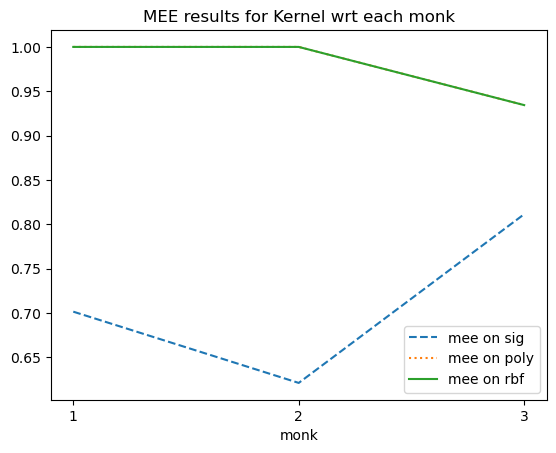

In [43]:
ax = df_results_sig.plot(x='monk', y='accuracy', linestyle='--', title="MEE results for Kernel wrt each monk",xticks=[1,2,3],label="mee on sig")

df_results_poly.plot(ax=ax,x='monk', y='accuracy' , linestyle='dotted' , label="mee on poly")
df_results_rbf.plot(ax=ax,x='monk', y='accuracy' , linestyle='solid' , label="mee on rbf")

plt.show()

# 3. MONK Model Assessment - EXPERIMENTS RESULTS:

In [44]:
def monk_gets_df_metrics_testset(grid_search_bykernel,upper_bound_monk=3):
    scores = []
    monk_n_list = []
    for i in range(1,(upper_bound_monk+1)):
        #print("monk "+str(i)+":")
        monk_n_list.append(i)

        X_train,y_train,X_test,y_test = create_Xy_sets_by_n(i)
        metrics = monk_predict_get_metrics_from_gs(X_train=X_train,y_train=y_train,grid_search_bykernel=grid_search_bykernel,Y_test=y_test,X_test=X_test,test=True)
        scores.append(metrics)

        df = pd.DataFrame(scores)
        df.insert(0, "monk", monk_n_list, True)
        df['accuracy'] = df['accuracy'].str[0].astype(float)
        df['mae'] = df['mae'].str[0].astype(float)
        df['mse'] = df['mse'].str[0].astype(float)
        df['mee'] = df['mee'].str[0].astype(float)
        df
    
    return df

testset_df_rbf = monk_gets_df_metrics_testset(rbf_grid_search)
testset_df_poly = monk_gets_df_metrics_testset(poly_grid_search)
testset_df_sig = monk_gets_df_metrics_testset(sig_grid_search)

In [47]:
print("rbf results:")
print(testset_df_rbf)
print('\npoly results')
print(testset_df_poly)
print('\nsigmoid results')
print(testset_df_sig)

rbf results:
   monk  accuracy       mae       mse       mee
0     1  0.555556  0.444444  0.444444  0.666667
1     2  0.476852  0.523148  0.523148  0.723290
2     3  0.972222  0.027778  0.027778  0.166667

poly results
   monk  accuracy       mae       mse       mee
0     1  0.555556  0.444444  0.444444  0.666667
1     2  0.476852  0.523148  0.523148  0.723290
2     3  0.972222  0.027778  0.027778  0.166667

sigmoid results
   monk  accuracy       mae       mse       mee
0     1  0.525463  0.474537  0.474537  0.688866
1     2  0.442130  0.557870  0.557870  0.746907
2     3  0.858796  0.141204  0.141204  0.375771


----

---